# Reaction-Diffusion in 2-D :  `A + B <-> C`, taken to equilibrium
#### Mostly forward reaction, with 1st-order kinetics for each species

Initial concentrations of `A` and `B` are spatially separated to the opposite ends of the system;
as a result, no `C` is being generated.

But, as soon as `A` and `B`, from their respective distant originating points, 
diffuse into the middle - and into each other - the reaction starts,
consuming most of `A` and `B`,
until an equilibrium is reached in both diffusion and reactions.

Note: This is a 2D version of the 1D experiment by the same name.

### TAGS :  "reactions 2D", "diffusion 2D", "quick-start"

In [1]:
LAST_REVISED = "Jan. 20, 2025"
LIFE123_VERSION = "1.0.0rc2"        # Library version this experiment is based on

In [2]:
#import set_path                    # Using MyBinder?  Uncomment this before running the next cell!

In [3]:
#import sys
#sys.path.append("C:/some_path/my_env_or_install")   # CHANGE to the folder containing your venv or libraries installation!
# NOTE: If any of the imports below can't find a module, uncomment the lines above, or try:  import set_path

from life123 import check_version, BioSim2D, ChemData, UniformCompartment

In [4]:
check_version(LIFE123_VERSION)

OK


In [5]:
# Initialize the system
chem_data = ChemData(names=["A", "B", "C"], diffusion_rates=[50., 50., 1.],   # `A` and `B` diffuse fast; `C` diffuses slowly
                     plot_colors=["red", "blue", "purple"])                   # Color choice is a reminder that red + blue = purple

In [6]:
bio = BioSim2D(x_bins=7, y_bins=7, chem_data=chem_data)

In [7]:
reactions = bio.get_reactions()

# Reaction A + B <-> C , with 1st-order kinetics for each species; note that it's mostly in the forward direction
reactions.add_reaction(reactants=["A", "B"], products="C", forward_rate=20., reverse_rate=2.)
reactions.describe_reactions()

Number of reactions: 1 (at temp. 25 C)
0: A + B <-> C  (kF = 20 / kR = 2 / delta_G = -5,708 / K = 10) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {"B" (blue), "C" (purple), "A" (red)}


# TIME 0 : Inject initial concentrations of `A` and `B` at opposite ends of the system

In [8]:
bio.set_bin_conc(bin_address = (0,0), chem_label="A", conc=20.)
bio.set_bin_conc(bin_address = (6,6), chem_label="B", conc=20.)

bio.describe_state()   # A minimalist view of all the chemical concentrations

SYSTEM STATE at Time t = 0:
Species `A`:
      0    1    2    3    4    5    6
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0
0  20.0  0.0  0.0  0.0  0.0  0.0  0.0
Species `B`:
     0    1    2    3    4    5     6
6  0.0  0.0  0.0  0.0  0.0  0.0  20.0
5  0.0  0.0  0.0  0.0  0.0  0.0   0.0
4  0.0  0.0  0.0  0.0  0.0  0.0   0.0
3  0.0  0.0  0.0  0.0  0.0  0.0   0.0
2  0.0  0.0  0.0  0.0  0.0  0.0   0.0
1  0.0  0.0  0.0  0.0  0.0  0.0   0.0
0  0.0  0.0  0.0  0.0  0.0  0.0   0.0
Species `C`:
     0    1    2    3    4    5    6
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0


In [9]:
bio.system_snapshot(chem_label="A")

0    1    2    3    4    5    6
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0
0  20.0  0.0  0.0  0.0  0.0  0.0  0.0

In [10]:
bio.system_snapshot(chem_label="B")

0    1    2    3    4    5     6
6  0.0  0.0  0.0  0.0  0.0  0.0  20.0
5  0.0  0.0  0.0  0.0  0.0  0.0   0.0
4  0.0  0.0  0.0  0.0  0.0  0.0   0.0
3  0.0  0.0  0.0  0.0  0.0  0.0   0.0
2  0.0  0.0  0.0  0.0  0.0  0.0   0.0
1  0.0  0.0  0.0  0.0  0.0  0.0   0.0
0  0.0  0.0  0.0  0.0  0.0  0.0   0.0

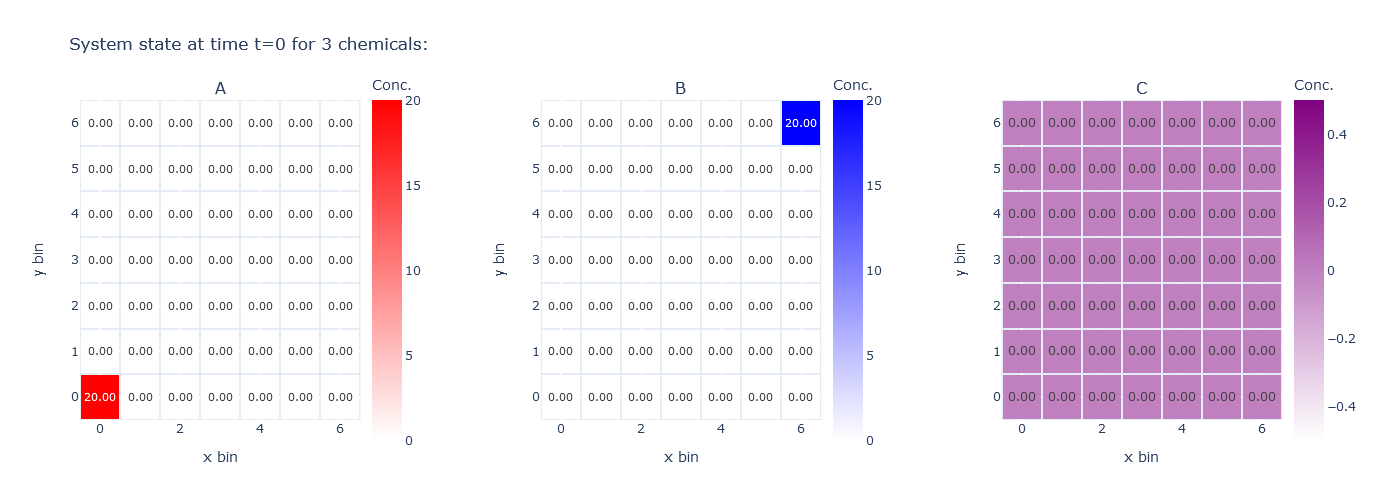

In [11]:
bio.system_heatmaps()

## Enable History

In [12]:
# Let's take a peek at the current concentrations of all chemicals in the bins with the initial concentration injections, as well as at the bin in the very center
bio.selected_concentrations(bins=[(0,0), (6,6), (3,3)])

{(0, 0): {'A': 20.0, 'B': 0.0, 'C': 0.0},
 (6, 6): {'A': 0.0, 'B': 20.0, 'C': 0.0},
 (3, 3): {'A': 0.0, 'B': 0.0, 'C': 0.0}}

In [13]:
# Let's enable history for those same 3 bins
bio.enable_history(bins=[(0,0), (6,6), (3,3)], frequency=2, take_snapshot=True)     # Taking a snapshot to include the current initial state in the history

History enabled for bins [(0, 0), (6, 6), (3, 3)] and chemicals None (None means 'all')


### Part 1 : advance to time t=0.002 (with smaller fixed steps)

In [14]:
bio.react_diffuse(total_duration=0.002, n_steps=10)
bio.describe_state()

SYSTEM STATE at Time t = 0.002:
Species `A`:
              0             1             2             3             4             5             6
6  3.765173e-09  1.523634e-10  2.352681e-12  1.621799e-14  4.200000e-17  0.000000e+00  0.000000e+00
5  4.371320e-07  2.201919e-08  4.530362e-10  4.685646e-12  2.428436e-14  5.040000e-17  0.000000e+00
4  3.549559e-05  2.133275e-06  5.474009e-08  7.538720e-10  5.855018e-12  2.428436e-14  4.200000e-17
3  1.980644e-03  1.380506e-04  4.240362e-06  7.288416e-08  7.538720e-10  4.685646e-12  1.621799e-14
2  7.282844e-02  5.764607e-03  2.059840e-04  4.240362e-06  5.474009e-08  4.530362e-10  2.352681e-12
1  1.602863e+00  1.416999e-01  5.764607e-03  1.380506e-04  2.133275e-06  2.201919e-08  1.523634e-10
0  1.649086e+01  1.602863e+00  7.282844e-02  1.980644e-03  3.549559e-05  4.371320e-07  3.765173e-09
Species `B`:
              0             1             2             3             4             5             6
6  3.765173e-09  4.371320e-07  3.549559e-0

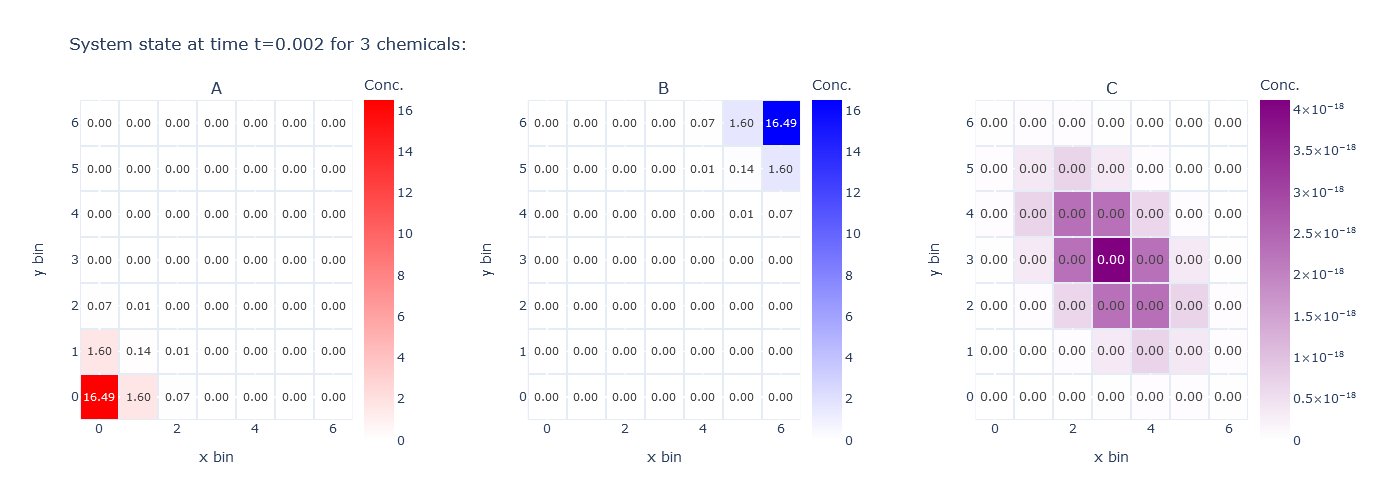

In [15]:
bio.system_heatmaps()

In [16]:
# Let's take a peek at the history saved so far, for the bins we requested history-keeping; we'll plot it at the end
bio.conc_history.bin_history(bin_address = (0,0))

SYSTEM TIME          A    B    C
0       0.0000  20.000000  0.0  0.0
1       0.0004  19.212000  0.0  0.0
2       0.0008  18.470258  0.0  0.0
3       0.0012  17.771471  0.0  0.0
4       0.0016  17.112602  0.0  0.0
5       0.0020  16.490859  0.0  0.0

In [17]:
bio.conc_history.bin_history(bin_address = (6,6))  # Notice the symmetry between `B` at bin (6,6) and `A` at bin (0,0)

SYSTEM TIME    A          B    C
0       0.0000  0.0  20.000000  0.0
1       0.0004  0.0  19.212000  0.0
2       0.0008  0.0  18.470258  0.0
3       0.0012  0.0  17.771471  0.0
4       0.0016  0.0  17.112602  0.0
5       0.0020  0.0  16.490859  0.0

In [18]:
# And in the central bin
bio.conc_history.bin_history(bin_address = (3,3))   # Notice how `A` and `B` are just beginning to diffuse into this bin, and the reaction `A + B <-> C` is just beginning to produce `C`

SYSTEM TIME             A             B             C
0       0.0000  0.000000e+00  0.000000e+00  0.000000e+00
1       0.0004  0.000000e+00  0.000000e+00  0.000000e+00
2       0.0008  0.000000e+00  0.000000e+00  0.000000e+00
3       0.0012  4.000000e-10  4.000000e-10  0.000000e+00
4       0.0016  1.043070e-08  1.043070e-08  2.984245e-20
5       0.0020  7.288416e-08  7.288416e-08  4.113414e-18

### Part 2 : continue advancing the simulation, with occasional visualization of system snapshots as heatmaps

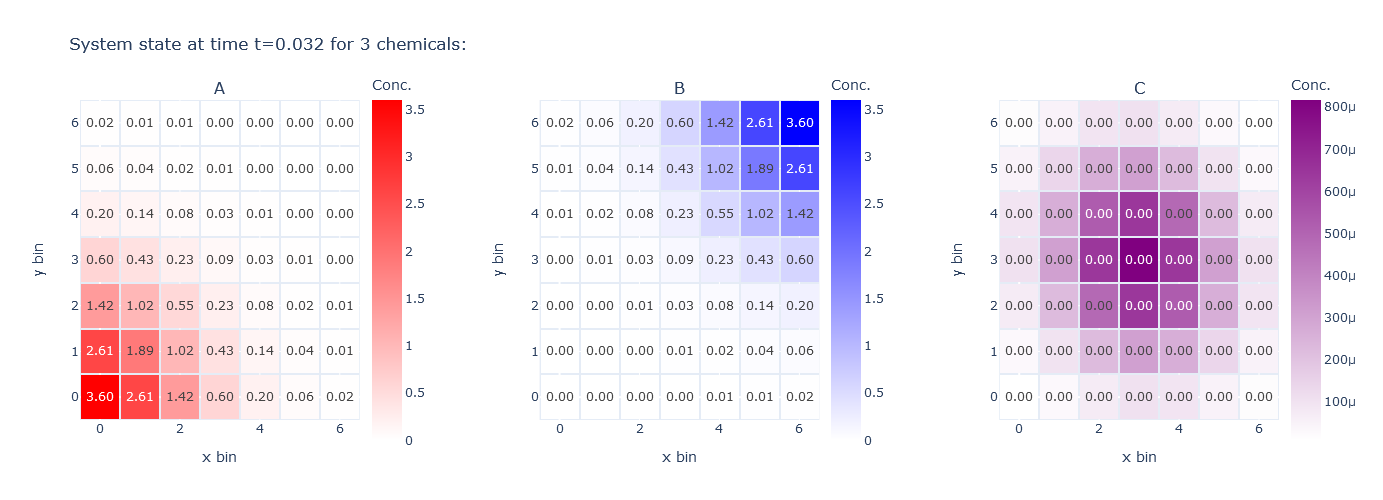

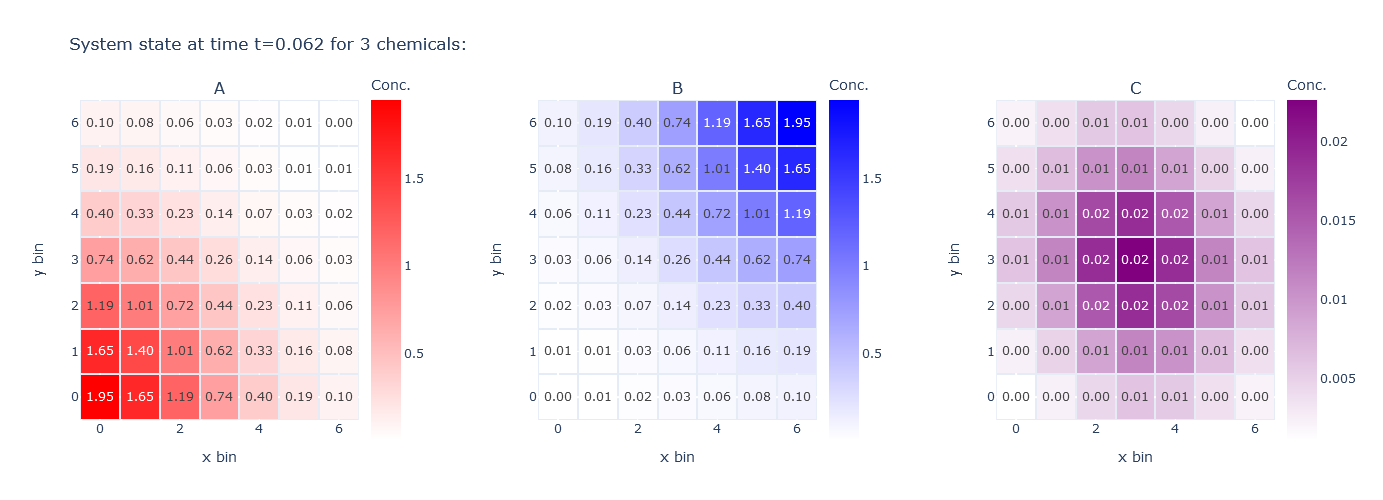

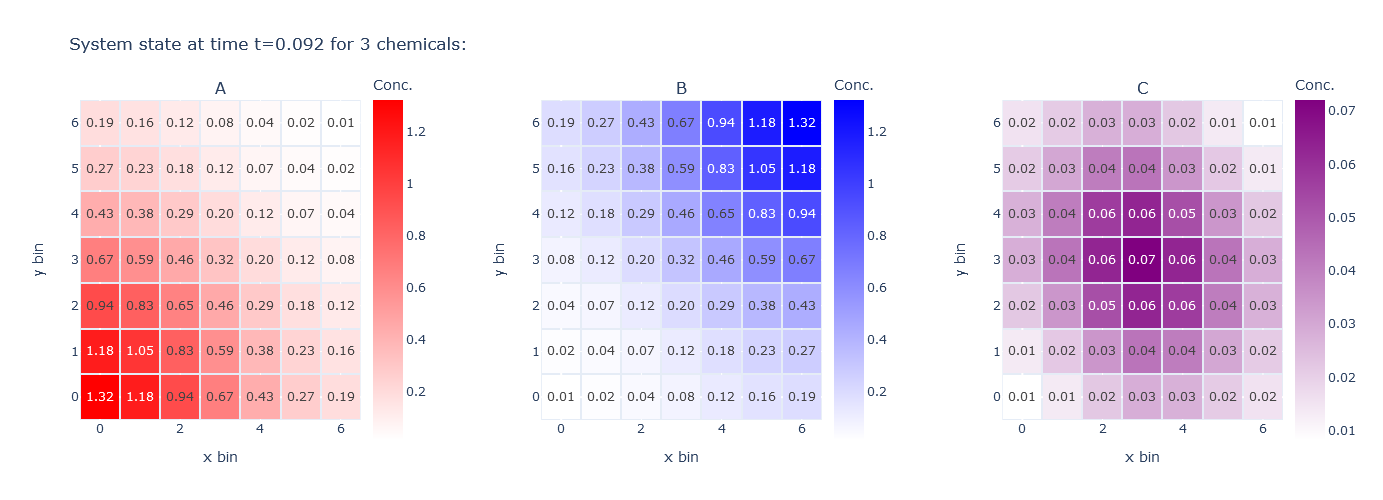

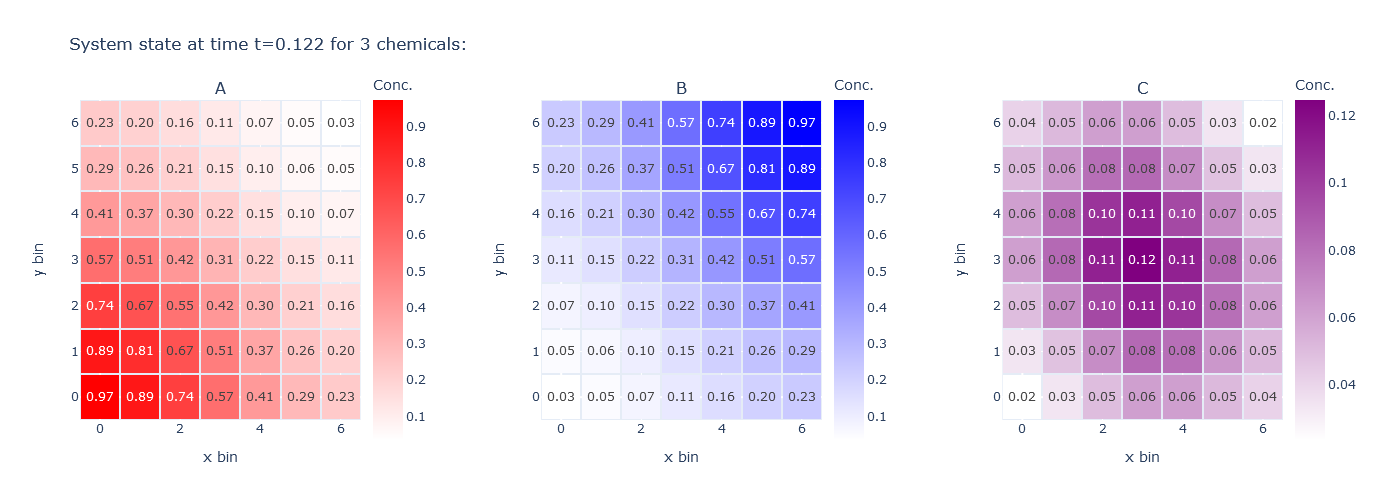

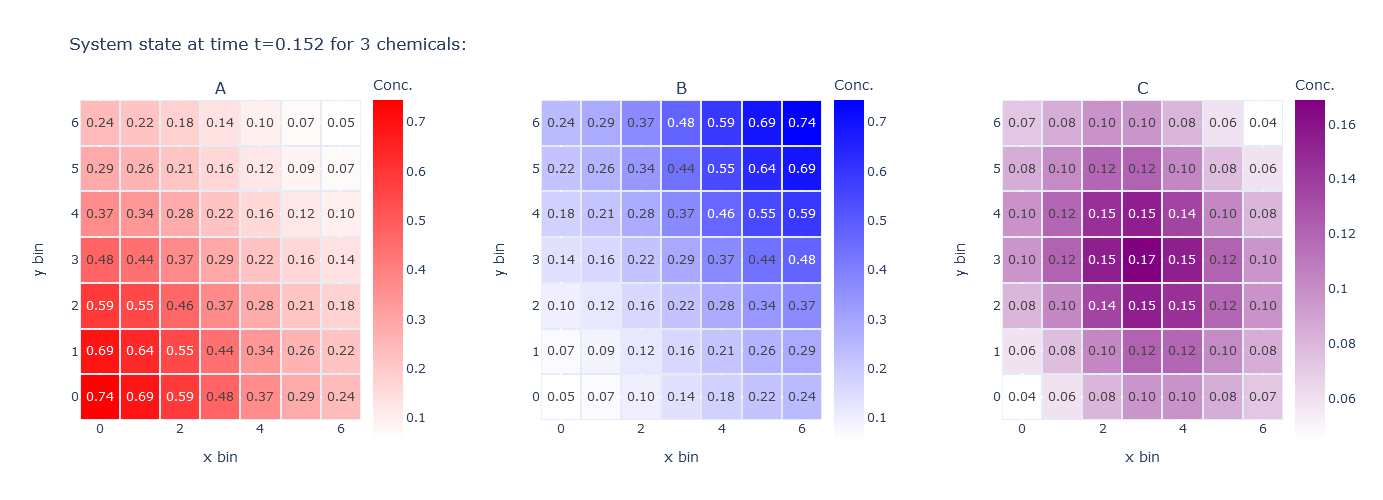

In [19]:
# Continue with a few larger steps
for _ in range(5):
    bio.react_diffuse(total_duration=0.03, n_steps=50)
    fig = bio.system_heatmaps()
    fig.show()

### Notice how `C` begins to get produced when `A` and `B` diffuse into each other, starting at the center bin (3,3)

### Part 3 : advance the reaction/diffusion to equilibrium

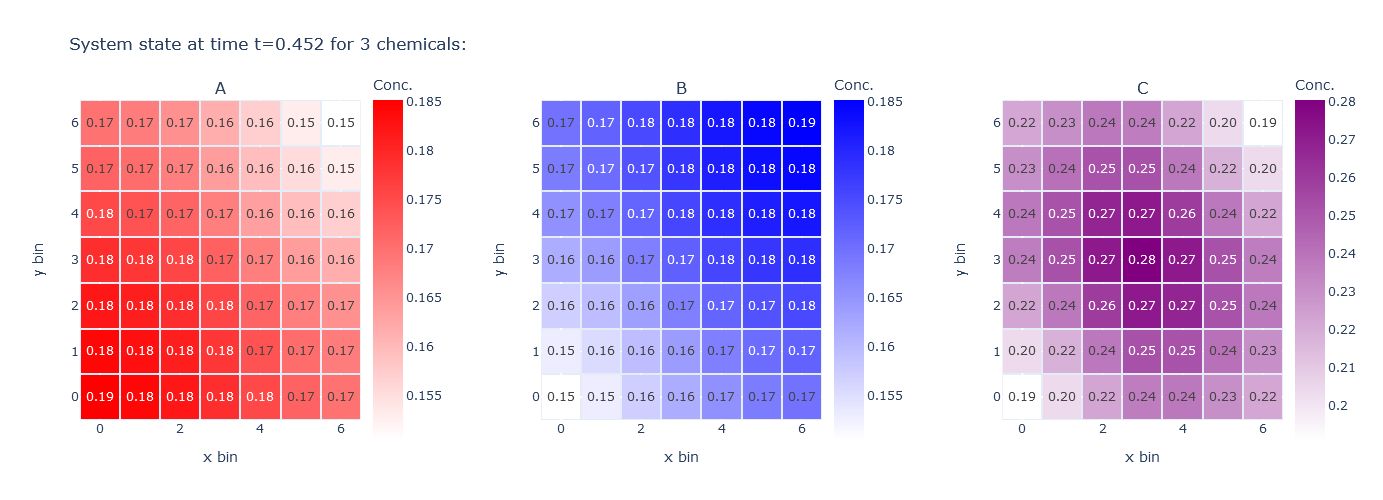

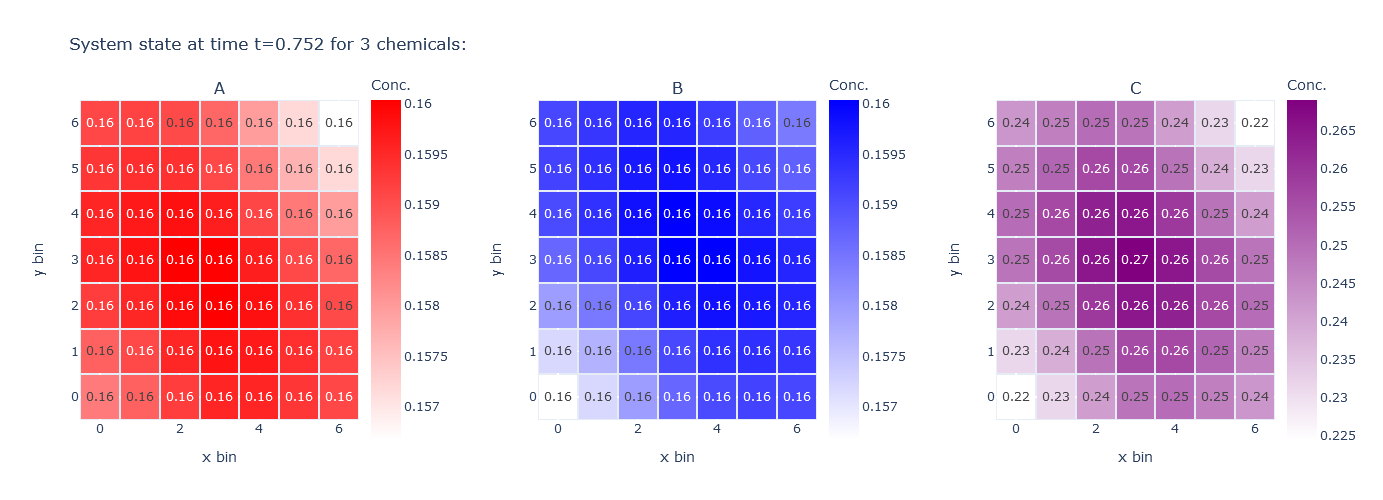

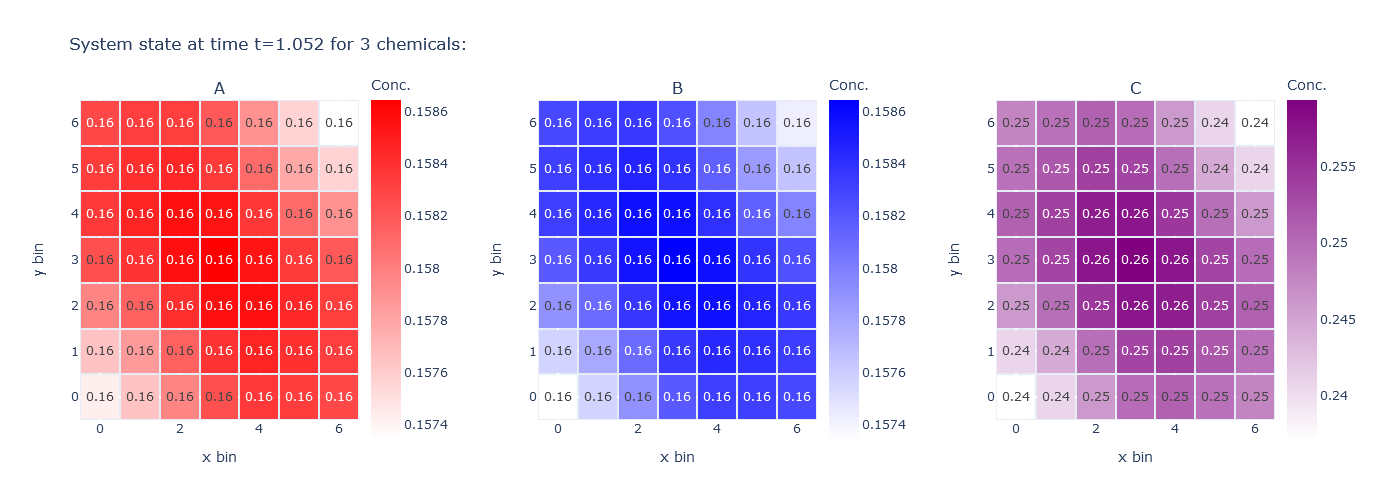

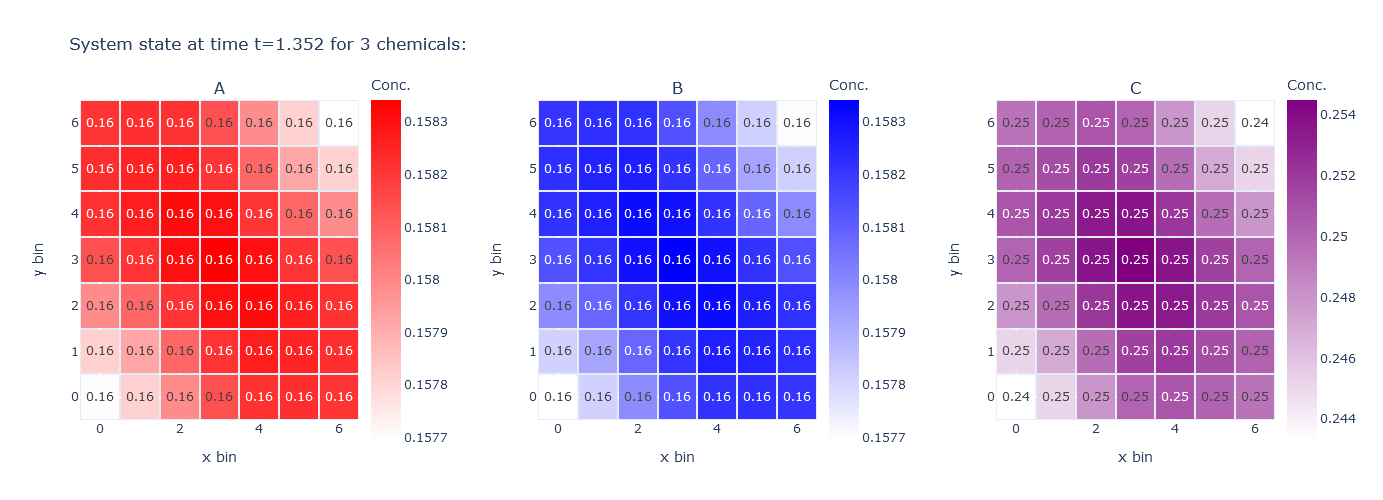

In [20]:
# Continue with more, and larger, steps
for _ in range(4):
    bio.react_diffuse(total_duration=0.3, n_steps=300)
    fig = bio.system_heatmaps()
    fig.show()

## Visualization of concentration changes with time at particular bins

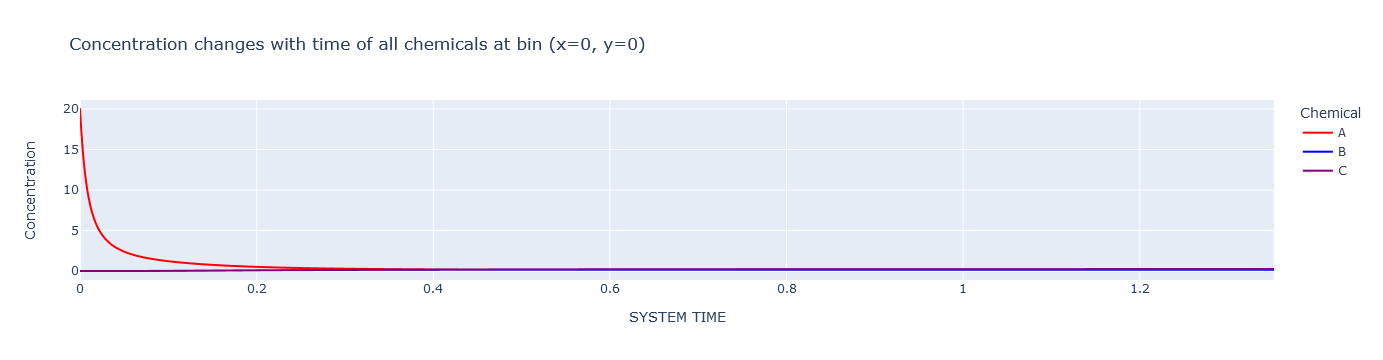

In [21]:
bio.plot_history_single_bin(bin_address = (0,0))    # The bin with the initial injection of 'A'

To separate the curves for `B` and `C`, one needs to substantially magnify the y-axis, because their concentrations at that bin are very similar throughout

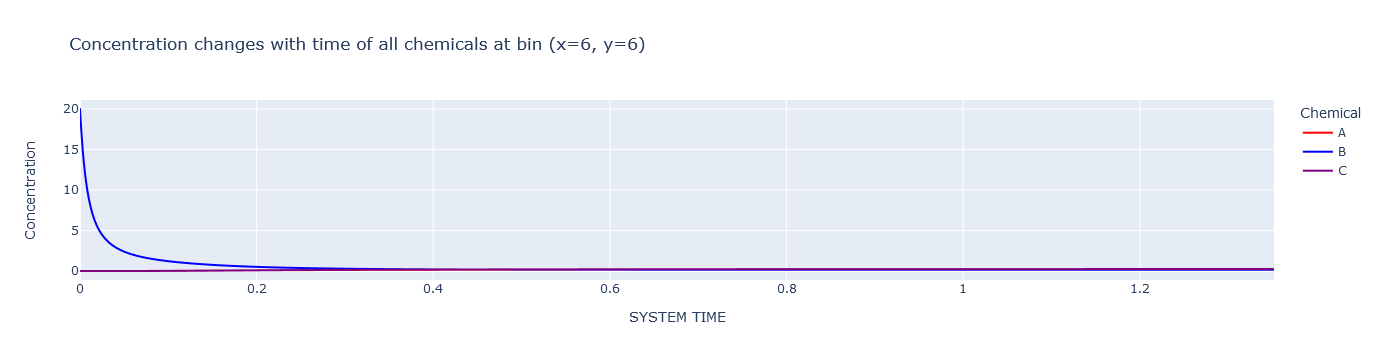

In [22]:
bio.plot_history_single_bin(bin_address = (6,6))    # The bin with the initial injection of 'B'

To separate the curves for `A` and `C`, one needs to substantially magnify the y-axis, because their concentrations at that bin are very similar throughout

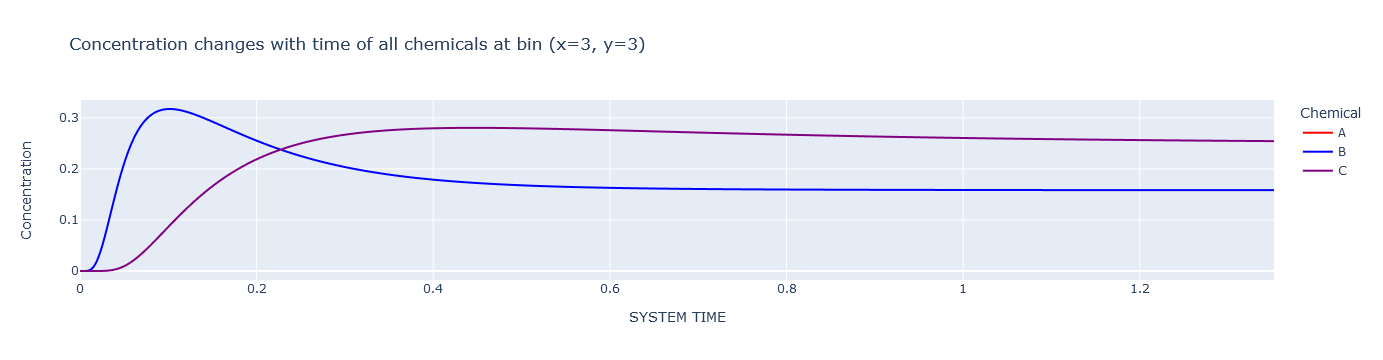

In [23]:
bio.plot_history_single_bin(bin_address = (3,3))      # The midpoint bin

`A` and `B` are completely superposed, from the perfect symmetry